# Time Series Analysis with Pandas

Basic time-series analysis with Pandas Series which have a built-in plotting method.

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

## Plot the Time Series

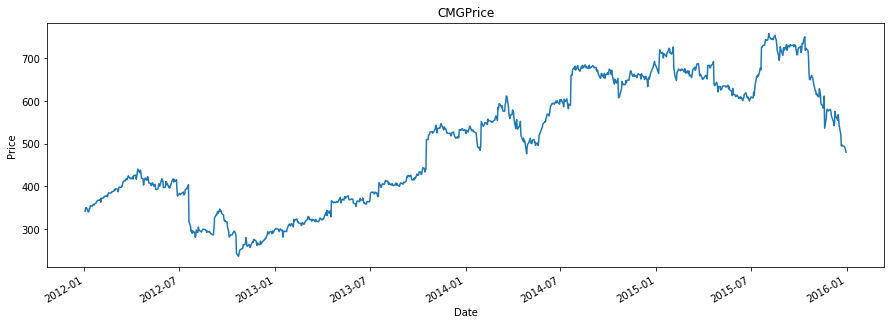

In [6]:
# Get prices of a stock
symbol = "CMG"
prices = web.DataReader(symbol, "yahoo", start = "2012-01-01", end = "2016-01-01" )["Adj Close"]

# Plot the non-stationary time series
prices.plot()
plt.title(symbol + "Price")
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()

## Use Time Series Built-In Descriptive Statistics

In [8]:
prices.describe()

count    1006.000000
mean      501.636650
std       146.688738
min       236.240005
25%       371.555000
50%       521.270020
75%       646.834991
max       757.770020
Name: Adj Close, dtype: float64

In [30]:
prices.median()

521.27001953125

## Generating Linear Combinaions of Series

Using the basic mathematical operators, Pandas will group up matching indices and perform calculations elemenwise to produce a new Series. 

### With Matching Indices

In [11]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0,5, len(prices)), index = prices.index) + 20

### Without Matching Indices

produces `NaN` values

In [13]:
prices + pd.Series(np.random.normal(0,1, len(prices))).head()

2012-01-03 00:00:00   NaN
2012-01-04 00:00:00   NaN
2012-01-05 00:00:00   NaN
2012-01-06 00:00:00   NaN
2012-01-09 00:00:00   NaN
                       ..
0                     NaN
1                     NaN
2                     NaN
3                     NaN
4                     NaN
Length: 1011, dtype: float64

## First-Order Differences

which are stationary.

Pandas Series have built-in methods to calcultae the percent change.

- **Additive Returns:** 

<p style="text-align:center;">$\Delta X_t$</p>

- **Multiplicative Returns:** 

<p style="text-align:center;">$\frac{\Delta X_t}{X_{t-1}}$ </p>

In [17]:
# Additive Returns
add_ret = prices.diff()[1:]

# Multiplicative Returns
mult_ret = prices.pct_change()[1:]

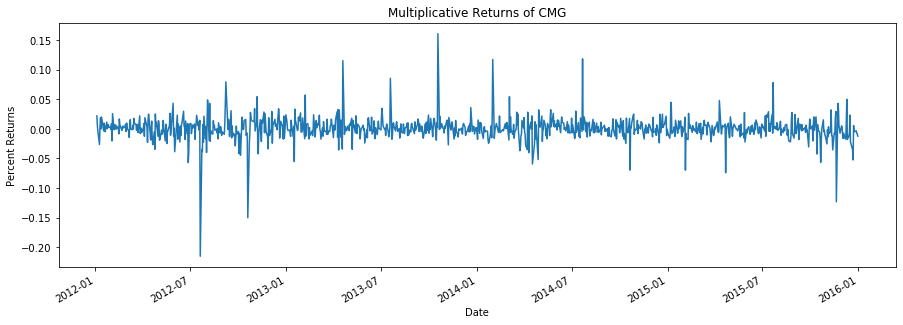

In [20]:
## Plot the resulting returns

mult_ret.plot()
plt.title("Multiplicative Returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
plt.show()

## Rolling Statistics

### Rolling Mean

Pandas has also a built-in method for calculative rolling statistics

**Rolling Mean:** `time-series.rolling(days).mean()`

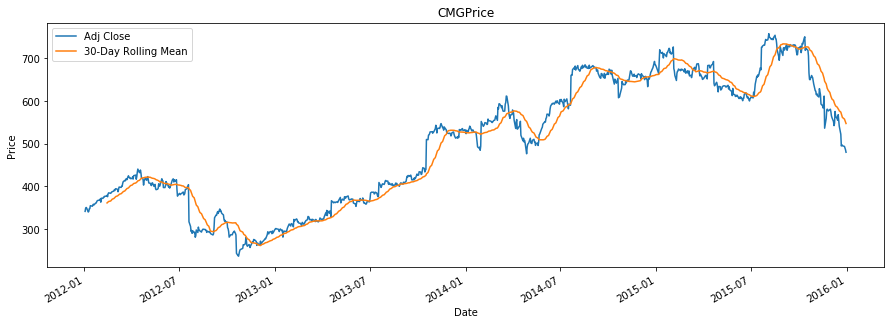

In [26]:
rolling_mean= prices.rolling(30).mean()
rolling_mean.name = "30-Day Rolling Mean"

## Plot the rolling mean
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Rolling Standard Deviation

**Rolling SD:** `time-series.rolling(days).std()`

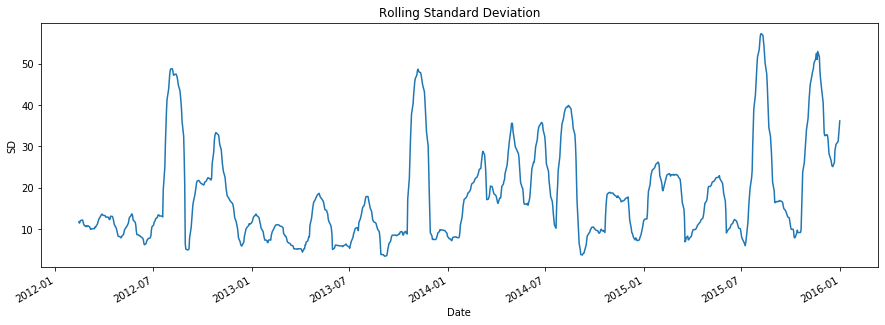

In [29]:
rolling_std = prices.rolling(30).std()

## Plot
rolling_std.plot()
plt.title("Rolling Standard Deviation")
plt.ylabel("SD")
plt.show()